In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from sherpa.data import Data2D
from sherpa.models.basic import Const2D
from sherpa.astro.models import Beta2D
from sherpa.stats import Chi2Gehrels
from sherpa.optmethods import LevMar
from sherpa.fit import Fit
from sherpa.instrument import PSFModel

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


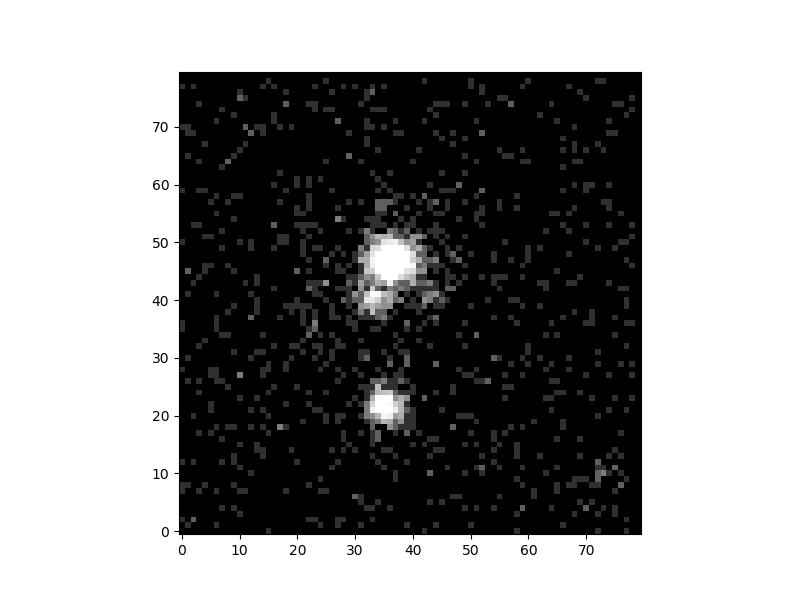

In [3]:
img = fits.open('./cxo_data.fits')[0].data

cmap = plt.cm.gray
cmap.set_bad('black')
cmap_norm = colors.LogNorm(vmin=0.5, vmax=20)


fig = plt.figure(figsize=(8,6))
plt.imshow(img,cmap=cmap,norm=cmap_norm,origin='lower')

Identifying peaks by eye:

x1=30.27, y1=40.23

x2=27.27, y2=33.66

x3=37.41, y3=33.80

x4=29.13, y4=14.94

In [4]:
x1,x0 = np.mgrid[:img.shape[0],:img.shape[1]]
x0axis = x0.ravel()
x1axis = x1.ravel()
yaxis = img.ravel()
data = Data2D('img', x0axis, x1axis, yaxis, shape=(img.shape[0], img.shape[1]))
print(data)

name      = img
x0        = Int64[6400]
x1        = Int64[6400]
y         = Int32[6400]
shape     = (80, 80)
staterror = None
syserror  = None


In [5]:
shift_tolerance = 3.0 # how much can the peaks move around in pixels
peak1 = Beta2D('peak1')
peak1.xpos = 36.5
peak1.xpos.min = peak1.xpos.val - shift_tolerance
peak1.xpos.max = peak1.xpos.val + shift_tolerance
peak1.ypos = 46.5
peak1.ypos.min = peak1.ypos.val - shift_tolerance
peak1.ypos.max = peak1.ypos.val + shift_tolerance
peak1.r0 = 1.5
peak1.r0.min = 1.0
peak1.ampl.min = 0.0
peak1.alpha.min = 1.0

peak2 = Beta2D('peak2')
peak2.xpos = 35.5
peak2.xpos.min = peak2.xpos.val - shift_tolerance
peak2.xpos.max = peak2.xpos.val + shift_tolerance
peak2.ypos = 21.5
peak2.ypos.min = peak2.ypos.val - shift_tolerance
peak2.ypos.max = peak2.ypos.val + shift_tolerance
peak2.r0 = 1.5
peak2.r0.min = 1.0
peak2.ampl.min = 0.0
peak2.alpha.min = 1.0

peak3 = Beta2D('peak3')
peak3.xpos = 33.5
peak3.xpos.min = peak3.xpos.val - shift_tolerance
peak3.xpos.max = peak3.xpos.val + shift_tolerance
peak3.ypos = 40.5
peak3.ypos.min = peak3.ypos.val - shift_tolerance
peak3.ypos.max = peak3.ypos.val + shift_tolerance
peak3.r0 = 1.5
peak3.r0.min = 1.0
peak3.ampl.min = 0.0
peak3.alpha.min = 1.0

peak4 = Beta2D('peak4')
peak4.xpos = 43.5
peak4.xpos.min = peak4.xpos.val - shift_tolerance
peak4.xpos.max = peak4.xpos.val + shift_tolerance
peak4.ypos = 40.5
peak4.ypos.min = peak4.ypos.val - shift_tolerance
peak4.ypos.max = peak4.ypos.val + shift_tolerance
peak4.r0 = 1.5
peak4.r0.min = 1.0
peak4.ampl.min = 0.0
peak4.alpha = 2.5
peak4.alpha.min = 1.0

bkg = Const2D('background')
bkg.c0 = 0.0
bkg.c0.min = 0.0
model = bkg + peak1 + peak2 + peak3 + peak4

print(model)

((((background + peak1) + peak2) + peak3) + peak4)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   background.c0 thawed            0            0  3.40282e+38           
   peak1.r0     thawed          1.5            1  3.40282e+38           
   peak1.xpos   thawed         36.5         33.5         39.5           
   peak1.ypos   thawed         46.5         43.5         49.5           
   peak1.ellip  frozen            0            0        0.999           
   peak1.theta  frozen            0     -6.28319      6.28319    radians
   peak1.ampl   thawed            1            0  3.40282e+38           
   peak1.alpha  thawed            1            1           10           
   peak2.r0     thawed          1.5            1  3.40282e+38           
   peak2.xpos   thawed         35.5         32.5         38.5           
   peak2.ypos   thawed         21.5         18.5         24.5           

In [6]:
fitter = Fit(data, model, stat=Chi2Gehrels(), method=LevMar(),)
results = fitter.fit()
print(results.message)
print(model)

successful termination
((((background + peak1) + peak2) + peak3) + peak4)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   background.c0 thawed    0.0759433            0  3.40282e+38           
   peak1.r0     thawed       2.2515            1  3.40282e+38           
   peak1.xpos   thawed       36.082         33.5         39.5           
   peak1.ypos   thawed      46.7988         43.5         49.5           
   peak1.ellip  frozen            0            0        0.999           
   peak1.theta  frozen            0     -6.28319      6.28319    radians
   peak1.ampl   thawed      305.915            0  3.40282e+38           
   peak1.alpha  thawed       2.6986            1           10           
   peak2.r0     thawed      1.85684            1  3.40282e+38           
   peak2.xpos   thawed      34.8955         32.5         38.5           
   peak2.ypos   thawed      21.8222         18.5 

<IPython.core.display.Javascript object>


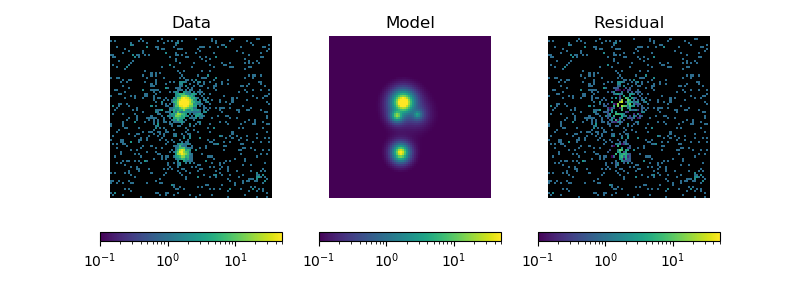

In [7]:
model_predict = model(x0axis, x1axis).reshape(img.shape[0], img.shape[1])

cmap = plt.cm.viridis
cmap.set_bad('black')
cmap_norm = colors.LogNorm(vmin=0.1, vmax=50)

def pimg(d, title):
    plt.imshow(d, origin='lower', interpolation='nearest',
               cmap=cmap,norm=cmap_norm)
    plt.axis('off')
    plt.colorbar(orientation='horizontal')
    plt.title(title)

plt.figure(figsize=(8, 3))
plt.subplot(1, 3, 1);
pimg(img, "Data")
plt.subplot(1, 3, 2)
pimg(model_predict, "Model")
plt.subplot(1, 3, 3)
pimg(img - model_predict, "Residual")

In [8]:
print(model)

((((background + peak1) + peak2) + peak3) + peak4)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   background.c0 thawed    0.0759433            0  3.40282e+38           
   peak1.r0     thawed       2.2515            1  3.40282e+38           
   peak1.xpos   thawed       36.082         33.5         39.5           
   peak1.ypos   thawed      46.7988         43.5         49.5           
   peak1.ellip  frozen            0            0        0.999           
   peak1.theta  frozen            0     -6.28319      6.28319    radians
   peak1.ampl   thawed      305.915            0  3.40282e+38           
   peak1.alpha  thawed       2.6986            1           10           
   peak2.r0     thawed      1.85684            1  3.40282e+38           
   peak2.xpos   thawed      34.8955         32.5         38.5           
   peak2.ypos   thawed      21.8222         18.5         24.5           

In [9]:
from sherpa.estmethods import Confidence
fitter.estmethod = Confidence()
print(fitter.estmethod)

name         = confidence
sigma        = 1
eps          = 0.01
maxiters     = 200
soft_limits  = False
remin        = 0.01
fast         = False
parallel     = True
numcores     = 12
maxfits      = 5
max_rstat    = 3
tol          = 0.2
verbose      = False
openinterval = False


In [10]:
errors = fitter.est_errors()

peak1.xpos lower bound:	-0.0310851
peak2.r0 lower bound:	-0.351956
peak1.xpos upper bound:	0.0310851
peak1.ypos lower bound:	-0.0314285
peak1.ypos upper bound:	0.0314285
peak2.alpha lower bound:	-0.433259
peak2.ypos lower bound:	-0.0864547
peak4.ypos lower bound:	-0.692863
peak3.ampl lower bound:	-5.17193
peak3.xpos lower bound:	-0.195144
peak2.ypos upper bound:	0.0849864
background.c0 lower bound:	-0.0267794
peak4.ampl lower bound:	-2.41097
peak2.r0 upper bound:	0.543692
peak4.alpha lower bound:	-0.462589
peak4.ypos upper bound:	-----
peak2.alpha upper bound:	0.794451
peak1.ampl lower bound:	-14.8342
peak2.xpos lower bound:	-0.0708084
background.c0 upper bound:	0.0276187
peak3.xpos upper bound:	0.19264
peak1.ampl upper bound:	15.4491
peak2.xpos upper bound:	0.0745647
peak2.ampl lower bound:	-8.78047
peak4.ampl upper bound:	2.62675
peak3.r0 lower bound:	-1.05125
peak3.ypos lower bound:	-0.233244
peak2.ampl upper bound:	9.46606
peak3.ampl upper bound:	10.5926
peak1.r0 lower bound:	-0.17